In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})

In [25]:
results = pd.read_excel("results.xlsx", header=[0,1], index_col=0)

# Simulated  - Complexidade

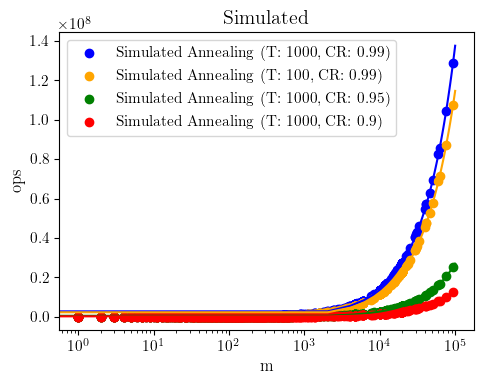

In [26]:
alg = "Simulated "
metrics = "#ops"
size = "m"
colors = ["blue", "orange", "green", "red"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        T = int(h1.replace(",", "").split()[3])
        CR = float(h1.replace(")", "").split()[5])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1}", color = colors[a])

        x = np.linspace(0, 10**5)
        K = np.ceil(np.log(10**-3 / T) / np.log(CR))
        y = x * K
        plt.plot(x, y, color = colors[a])
plt.title(f"{alg}")
plt.xlabel(f"{size}")
plt.ylabel(f"{metrics}"[1:])
plt.legend()
plt.xscale("log")
plt.tight_layout()
plt.savefig(f"assets/ops_{alg}.png", transparent=True)
plt.show()

# random sol - complexidade

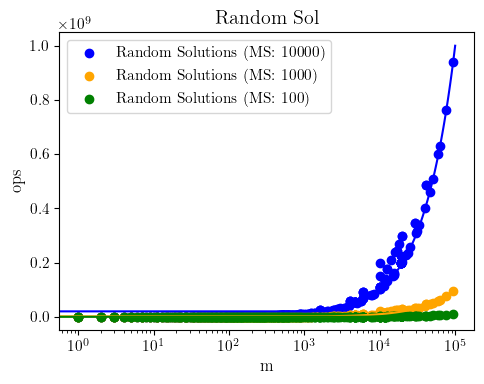

In [27]:
alg = "Random Sol"
metrics = "#ops"
size = "m"
colors = ["blue", "orange", "green", "red"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        MS = int(h1.replace(")", "").split()[3])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1}", color = colors[a])

        x = np.linspace(0, 10**5)
        y = MS * x 
        plt.plot(x, y, color = colors[a])
plt.title(f"{alg}")
plt.xlabel(f"{size}")
plt.ylabel(f"{metrics}"[1:])
plt.legend()
plt.xscale("log")
plt.tight_layout()
plt.savefig(f"assets/ops_{alg}.png", transparent=True)
plt.show()

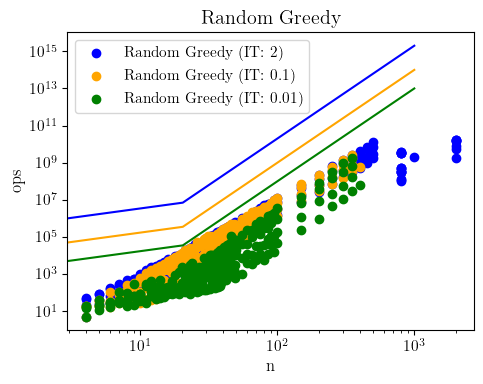

In [35]:
alg = "Random Greedy"
metrics = "#ops"
size = "n"
colors = ["blue", "orange", "green", "red"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        itlim = float(h1.replace(")", "").split()[3])


        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1}", color = colors[a])

        x = np.linspace(0, 10**3)
        y = x**5 * itlim

        plt.plot(x, y, color = colors[a])
plt.title(f"{alg}")
plt.xlabel(f"{size}")
plt.ylabel(f"{metrics}"[1:])
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig(f"assets/ops_{alg}.png", transparent=True)
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input sizes
n = np.arange(1, 1001)  # Input size from 1 to 1000

# Define complexity functions
constant = np.ones_like(n)        # O(1)
logarithmic = np.log2(n)          # O(log n)
linear = n                        # O(n)
quadratic = n**2                  # O(n^2)
cubic = n**3                      # O(n^3)

# Create the plot
plt.figure(figsize=(12, 8))

# Fill areas between curves
plt.fill_between(n, 0, constant, alpha=0.3, label="O(1)", color="blue")
plt.fill_between(n, constant, logarithmic, alpha=0.3, label="O(log n)", color="green")
plt.fill_between(n, logarithmic, linear, alpha=0.3, label="O(n)", color="orange")
plt.fill_between(n, linear, quadratic, alpha=0.3, label="O(n^2)", color="red")
plt.fill_between(n, quadratic, cubic, alpha=0.3, label="O(n^3)", color="purple")

# Customize the plot
plt.xscale('log')  # Logarithmic scale for x-axis
plt.yscale('log')  # Logarithmic scale for y-axis
plt.xlabel("Input size (n)", fontsize=14)
plt.ylabel("Operations", fontsize=14)
plt.title("Complexity Growth with Shaded Areas", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()


RuntimeError: latex was not able to process the following string:
b'O(n^2)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp1nik0g9m 019a44c4571bc1d06d0547c5ef973d59.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./019a44c4571bc1d06d0547c5ef973d59.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-07-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/02/08 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 019a44c4571bc1d06d0547c5ef973d59.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.29 {\rmfamily O(n^
                    2)}%
No pages of output.
Transcript written on tmp1nik0g9m/019a44c4571bc1d06d0547c5ef973d59.log.




<Figure size 1200x800 with 1 Axes>

# AJUSTAR REGRESSOES AUTMATOCIAS